# Standa 8SMC5-USB Python tutorial

This jupyter notebook shows how to work with [8SMC5 Standa Motor Controllers](https://doc.xisupport.com/en/8smc5-usb/8SMCn-USB/About/General_information.html) over the [libximc](http://files.xisupport.com/8SMC4-USB_Programming_manual_Eng.pdf) python binding.

By default this notebook uses virtual controller. So you don’t need any real hardware. But if you have one, you can also test it with this notebook.

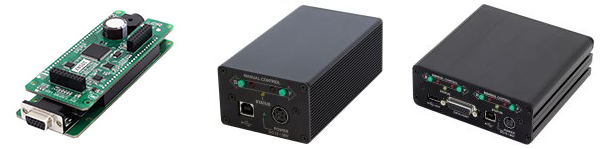

In case you are not familiar with Jupyter Notebooks, check [official documentation](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html).

# Installing libximc for python

If you don’t have python libximc library on your PC, you can install it with `pip` from [PyPi](https://pypi.org/project/libximc/). If you have already installed the library, you can skip this step.

In [ ]:
!pip install libximc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 1.5 MB/s eta 0:00:00


It’s good practice to use a virtual environment - see [this guide](https://dev.to/bowmanjd/python-tools-for-managing-virtual-environments-3bko#howto) for details on using virtual environments.

If you have faced any issues while installing the library and you have no idea how to solve them, contact our **technical support** via:

* Website: [en.xisupport.com](https://en.xisupport.com/account/register)
* E-mail: [8smc4@standa.lt](mailto:8smc4@standa.lt)
* Telegram: [@SMC5TechSupport](https://t.me/SMC5TechSupport)
* WhatsApp: [+1 (530) 584-4117](https://wa.me/15852826387)

# Initialization

In [7]:
import pathlib
import os
import time
import libximc.highlevel as ximc

### Virtual device creation

Virtual device is just a binary file with a number of settings. In case there is no such file, it will be created automatically with default settings in current notebook working directory during the first device access.

In case you are going to work with a real device, you can skip this step.

In [9]:
virtual_device_filename = "virtual_motor_controller_1.bin"
virtual_device_file_path = os.path.join(
    pathlib.Path().cwd(),
    virtual_device_filename
)

### Real devices search

Now we will look for real 8SMC5 devices on your PC.

In [9]:
# Devices search
devices = ximc.enumerate_devices(
    ximc.EnumerateFlags.ENUMERATE_NETWORK |
    ximc.EnumerateFlags.ENUMERATE_PROBE
)
uris = {}
if len(devices) == 0:
    print("The real devices were not found. A virtual device will be used.")
else:
    # Print real devices list
    print("Found {} real device(s):".format(len(devices)))
    for device in devices:
        print("  {}".format(device))
        uris[device["ControllerName"]] = device["uri"]

Found 3 real device(s):
  {'uri': 'xi-com:\\\\.\\COM5', 'device_serial': 716, 'Manufacturer': 'XIMC', 'ManufacturerId': 'SM', 'ProductDescription': 'XISM-USB', 'Major': 4, 'Minor': 104, 'Release': 46177, 'ControllerName': 'Axis 1', 'CtrlFlags': 0, 'PositionerName': ''}
  {'uri': 'xi-com:\\\\.\\COM3', 'device_serial': 6883, 'Manufacturer': 'XIMC', 'ManufacturerId': 'SM', 'ProductDescription': 'XISM-USB', 'Major': 2, 'Minor': 2, 'Release': 4, 'ControllerName': 'Axis 3', 'CtrlFlags': 0, 'PositionerName': ''}
  {'uri': 'xi-com:\\\\.\\COM4', 'device_serial': 3085, 'Manufacturer': 'XIMC', 'ManufacturerId': 'SM', 'ProductDescription': 'XISM-USB', 'Major': 2, 'Minor': 2, 'Release': 3, 'ControllerName': 'Axis 2', 'CtrlFlags': 0, 'PositionerName': ''}


In [21]:
set(uris.keys())

{'Axis 1', 'Axis 2', 'Axis 3'}

In [15]:
for i in range(0):
    print(i)


### Device URI setup

Each motor controller in the system should have a unique URI. Use such URI to connect to the specific device.

There are several URI types:
* `xi-emu:///<abs_path_to_file>` - for virtual devices.
* `xi-com:\\.\COM<N>` - for local devices connected via USB on Windows.
* `xi-com:///dev/ttyACM<N>` - for local devices connected via USB on Linux/MacOS.
* `xi-tcp://<IP>:<Port>` - for network devices with Ethernet support.
* `xi-net://<IP>/serial` - for network devices connected through Standa 8Eth1 converter.

To use real device, change URI in the cell below. In case you don’t have any real devices, execute the cell without URI modification.

In [10]:
device_uri = 'xi-com:\\\\.\\COM5'
# device_uri = "xi-emu:///{}".format(virtual_device_file_path)
# device_uri = r"xi-com:\\.\COM29"
# device_uri = r"xi-com:///dev/ttyACM29"
# device_uri = "xi-tcp://172.16.131.140:1820"
# device_uri = "xi-net://192.168.1.120/abcd"

## First steps

In the beginning you should create `Axis` instance using desired URI. As a result you will get an object (in our example it's called `axis`) through which you will be able to interact with the device.

The connection is closed automatically when the garbage collector destructs `Axis` object. But of course you can close the connection manually via `axis.close_device()`.

In [12]:
axis = ximc.Axis(device_uri)
# axis = ximc.Axis("xi-emu:"+virtual_device_file_path)
# To open the connection, you must manually call `open_device()` method
axis.open_device()

# `close_device()` is optional. It's called automatically by the garbage
# colle


In [16]:
step_to_mm_conversion_coeff = 0.005  # mm / step

# Get information about microstep mode
engine_settings = axis.get_engine_settings()

# Now we can set calibration settings for our axis
axis.set_calb(step_to_mm_conversion_coeff, engine_settings.MicrostepMode)

In [21]:
move_settings = axis.get_move_settings_calb()
move_settings.Speed

5.0

In [1]:
from standa_stage import StandaStage, get_connected_axes, get_virtual_axes
uris = get_virtual_axes(3)
stage = StandaStage(uris)

In [2]:
stage.get_position()

Current Position: ['30.0 mm', '30.0 mm', '30.0 mm'] (x,y,z)


[30.0, 30.0, 30.0]

In [5]:
stage.move([10,10,10])

Finished moving axis0 after 10031.41 ms
Current Position: ['20.0 mm', '10.0 mm', '10.0 mm'] (x,y,z)
Finished moving axis1 after 10033.18 ms
Current Position: ['20.0 mm', '20.0 mm', '10.0 mm'] (x,y,z)
Finished moving axis2 after 10023.54 ms
Current Position: ['20.0 mm', '20.0 mm', '20.0 mm'] (x,y,z)


In [4]:
stage.adjust_velocity((4/10,4/10,2/10))

Current Velocity: ['2.5 mm/s?', '2.5 mm/s?', '5.0 mm/s?'] (xyz)
Setting velocity for axis 0 from 2.5mm/s to 1.0mm/s
Setting velocity for axis 1 from 2.5mm/s to 1.0mm/s
Setting velocity for axis 2 from 5.0mm/s to 1.0mm/s


In [8]:
del stage

In case you received an error message at this step, check that the device:
* is powered;
* is physically connected to your PC;
* is not used by other applications.

Try reconnecting the device physically or try making a hardware reboot.

Now let’s perform a simple shift.

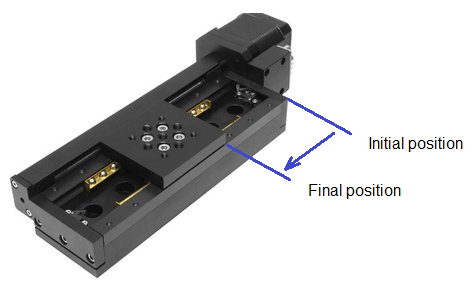

In [13]:
axis.close_device()
axis.open_device()
# get_position method returns get_position_t object
position = axis.get_position()
print("Initial position:", position.Position)

print("Start moving")
axis.command_right()
for i in range(3):
    time.sleep(1)
    print("Moving...")

print("Stop moving")
axis.command_stop()

position = axis.get_position()
print("Final position:", position.Position)
axis.close_device()

Initial position: 0
Start moving
Moving...
Moving...
Moving...
Stop moving
Final position: 4700


## Moving to a specific coordinates

You can use `command_move()` and `command_movr()` methods to move axis to a specific absolute or relative position respectively.

The following sequence of absolute and relative movements will be performed in the cell below.

![]( 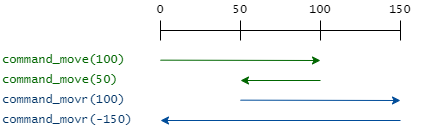)

In [14]:
axis.open_device()

# ==== Set current position as zero ====
axis.command_zero()

# Object instances should be passed by reference
position = axis.get_position()
print("Initial position:", position.Position)


# ==== Move to the first absolute position (X = 100) ====
next_position = 100
print("Move to position:", next_position)
axis.command_move(next_position, 0)

print("Moving...")
axis.command_wait_for_stop(100)

position = axis.get_position()
print("Current position:", position.Position)


# ==== Move to the second absolute position (X = 50) ====
next_position = 50
print("Move to position:", next_position)
axis.command_move(next_position, 0)

print("Moving...")
axis.command_wait_for_stop(100)

position = axis.get_position()
print("Current position:", position.Position)


# ==== Perform a relative shift by 100 ====
relative_shift = 100
print("Perform a relative shift by", relative_shift)
print("So we are going to", position.Position, "+", relative_shift,
      " =", position.Position + relative_shift)
axis.command_movr(relative_shift, 0)

print("Moving...")
axis.command_wait_for_stop(100)

position = axis.get_position()
print("Current position:", position.Position)


# ==== Perform a relative shift by -150 ====
relative_shift = -150
print("Perform a relative shift by", relative_shift)
print("So we are going to", position.Position, "+ (", relative_shift,
      ") =", position.Position + relative_shift)
axis.command_movr(relative_shift, 0)

print("Moving...")
axis.command_wait_for_stop(100)

position = axis.get_position()
print("Current position:", position.Position)

axis.close_device()
print("Done")

Initial position: 0
Move to position: 100
Moving...
Current position: 100
Move to position: 50
Moving...
Current position: 50
Perform a relative shift by 100
So we are going to 50 + 100  = 150
Moving...
Current position: 150
Perform a relative shift by -150
So we are going to 150 + ( -150 ) = 0
Moving...
Current position: 0
Done


## Using user units

By default all values (position, speed, acceleration…) are represented in motor steps and microsteps. You can use more convenient custom units such as millimeters, inches, degrees, radians by calling `_calb` postfixed methods.

To use user units you should know conversion coefficient in units per step. In most cases you can find such coefficient in specification for your stage.

For example [8MT193-100 Motorized Linear Stage](https://www.standa.lt/products/catalog/motorised_positioners?item=62&prod=motorized_linear_stage) has 2.5 µm / step resolution. In case you would like to use millimeters as user units, the conversion coefficient will be 0.0025 mm / step.

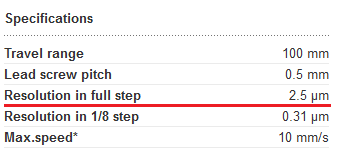

In [15]:
axis.open_device()

# ==== User unit setup ====
# We will use mm as user units
# In our example conversion coefficient will be 0.0025 mm / step.
# Set conversion coefficient for your stage here if needed
step_to_mm_conversion_coeff = 0.005  # mm / step

# Get information about microstep mode
engine_settings = axis.get_engine_settings()

# Now we can set calibration settings for our axis
axis.set_calb(step_to_mm_conversion_coeff, engine_settings.MicrostepMode)

# ==== Perform a shift by using user units (mm in our case) ====
position_calb = axis.get_position_calb()
print("Current position:", position_calb.Position, "mm")

next_position_in_mm = 5.21
print("Move to position:", next_position_in_mm, "mm")
axis.command_move_calb(next_position_in_mm)

print("Moving...")
axis.command_wait_for_stop(100)

position_calb = axis.get_position_calb()
print("Current position:", position_calb.Position, "mm")

next_position_in_mm = 0
print("Move to position:", next_position_in_mm, "mm")
axis.command_move_calb(next_position_in_mm)

print("Moving...")
axis.command_wait_for_stop(100)

position_calb = axis.get_position_calb()
print("Current position:", position_calb.Position, "mm")

axis.close_device()
print("Done")

Current position: 0.0 mm
Move to position: 5.21 mm
Moving...
Current position: 5.210000038146973 mm
Move to position: 0 mm
Moving...
Current position: 0.0 mm
Done


## Asynchronous device control

Physical axis motion takes some time. In previous examples we have used `command_wait_for_stop()` to suspend the program execution until the end of the movement.

You can manually check current device status and perform some other operations in parallel with the axis motion in your program.

Now let’s record and plot the motion profile.


In [ ]:
# Install matplotlib library(https://matplotlib.org/) to create plots
!pip install matplotlib

In [16]:
import matplotlib.pyplot as plt

Current position: 0
Move to position: 4000
Moving...
Current position: 4000
Move to position: 0
Moving...
Movement finished
Current position: 0


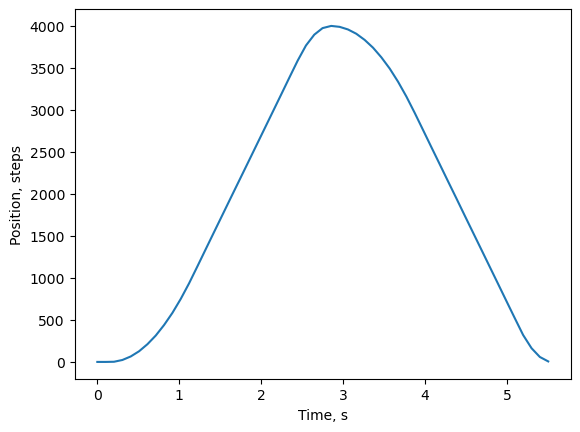

In [17]:
axis.open_device()

# Arrays for logging positions and timestamps during motion
positions = []
timestamps_s = []

axis.command_zero()

position = axis.get_position()
print("Current position:", position.Position)

# ==== Shift the stage ====
next_position = 4000
print("Move to position:", next_position)
axis.command_move(next_position, 0)

print("Moving...")

t_start_s = time.time()

# Check axis motion status in a loop
status = axis.get_status()
while status.MvCmdSts & ximc.MvcmdStatus.MVCMD_RUNNING:
    position = axis.get_position()

    # Do some job during the motion
    positions.append(position.Position)
    timestamps_s.append(time.time() - t_start_s)

    time.sleep(0.1)

    # Update status for the next check of the loop condition
    status = axis.get_status()

position = axis.get_position()
print("Current position:", position.Position)


# ==== Shift the stage back ====
next_position = 0
print("Move to position:", next_position)
axis.command_move(next_position, 0)

print("Moving...")

# Check axis motion status in a loop
status = axis.get_status()
while status.MvCmdSts & ximc.MvcmdStatus.MVCMD_RUNNING:
    position = axis.get_position()

    # Do some job during the motion
    positions.append(position.Position)
    timestamps_s.append(time.time() - t_start_s)

    time.sleep(0.1)

    # Update status for the next check of the loop condition
    status = axis.get_status()

print("Movement finished")

position = axis.get_position()
print("Current position:", position.Position)

axis.close_device()

# ==== Plot motion profile ====
plt.plot(timestamps_s, positions)
plt.xlabel("Time, s")
plt.ylabel("Position, steps")
plt.show()

## Setup motion settings

You can change motion settings (for example speed) at any time. Even while the axis is moving.

In [18]:
axis.open_device()

positions = []
timestamps_s = []

# ==== Shift the stage ====
next_position = 4000
print("Move to position:", next_position)
axis.command_move(next_position, 0)

print("Moving...")

t_start_s = time.time()

# We will move for 2 s with current speed. Then we will increase the speed.
while (time.time() < t_start_s + 2):
    position = axis.get_position()

    # Do some job during the motion
    positions.append(position.Position)
    timestamps_s.append(time.time() - t_start_s)

    time.sleep(0.1)

    # Update status for the next check of the loop condition
    statux = axis.get_status()


# Increase the speed on the fly
move_settings = axis.get_move_settings()
move_settings.Speed *= 4
move_settings.Accel *= 4
move_settings.Decel *= 4
axis.set_move_settings(move_settings)
print("Speed increased 4 times")

# Wait until the end of the motion
status = axis.get_status()
while status.MvCmdSts & ximc.MvcmdStatus.MVCMD_RUNNING:
    position = axis.get_position()

    # Do some job during the motion
    positions.append(position.Position)
    timestamps_s.append(time.time() - t_start_s)

    time.sleep(0.1)

    # Update status for the next check of the loop condition
    status = axis.get_status()


# ==== Shift the stage back ====
# Decrease the speed
move_settings = axis.get_move_settings()
move_settings.Speed //= 8
axis.set_move_settings(move_settings)
print("Speed decreased 8 times")

next_position = 0
print("Move to position:", next_position)
axis.command_move(next_position, 0)

print("Moving...")

# Check axis motion status in a loop
status = axis.get_status()
while status.MvCmdSts & ximc.MvcmdStatus.MVCMD_RUNNING:
    position = axis.get_position()

    # Do some job during the motion
    positions.append(position.Position)
    timestamps_s.append(time.time() - t_start_s)

    time.sleep(0.1)

    # Update status for the next check of the loop condition
    status = axis.get_status()


print("Movement finished")


print("Set initial speed")
move_settings = axis.get_move_settings()
move_settings.Speed *= 2
move_settings.Accel //= 4
move_settings.Decel //= 4
axis.set_move_settings(move_settings)

axis.close_device()

# ==== Plot motion profile ====
plt.plot(timestamps_s, positions)
plt.axvline(2, linestyle="dotted")
plt.xlabel("Time, s")
plt.ylabel("Position, steps")
plt.show()

Move to position: 4000
Moving...


ValueError: MoveFlags = 0xcc cannot be decomposed into libximc.highlevel.MoveFlags' flags!

More information about the libximc library you can find on this page: https://libximc.xisupport.com/doc-en/index.html

Standa 8SMC5-USB motor controller user manual: https://doc.xisupport.com/en/8smc5-usb/

Standa website: https://www.standa.lt/